<a href="https://colab.research.google.com/github/heena-khona/diabetes_detection/blob/main/my_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#load dataset and read first five rows
df=pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
#checking for missing values usinf not null
not_missingval = df.notnull()
print(not_missingval)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           True     True           True           True     True  True   
1           True     True           True           True     True  True   
2           True     True           True           True     True  True   
3           True     True           True           True     True  True   
4           True     True           True           True     True  True   
..           ...      ...            ...            ...      ...   ...   
763         True     True           True           True     True  True   
764         True     True           True           True     True  True   
765         True     True           True           True     True  True   
766         True     True           True           True     True  True   
767         True     True           True           True     True  True   

     DiabetesPedigreeFunction   Age  Outcome  
0                        True  True     True  
1                

Exploratory Data Ananlytics

In [ ]:
#summary stats
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

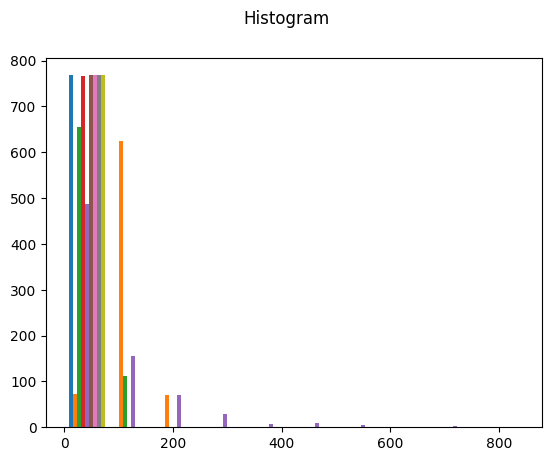

In [ ]:
plt.hist(df)
plt.suptitle("Histogram")
plt.show()

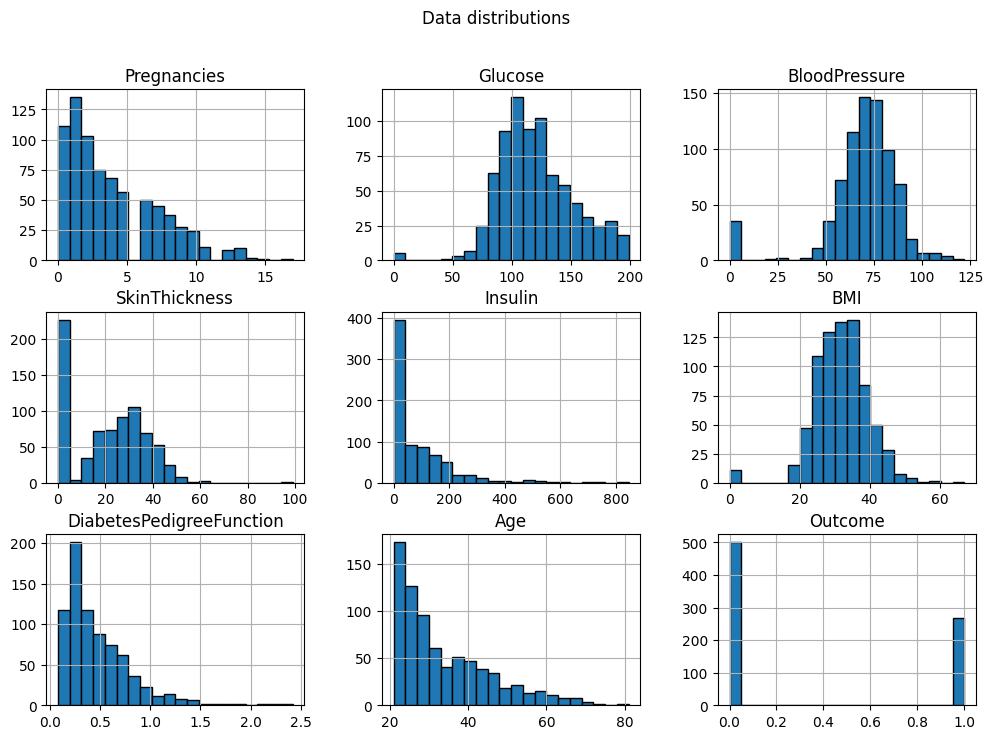

In [ ]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Data distributions")
plt.show()

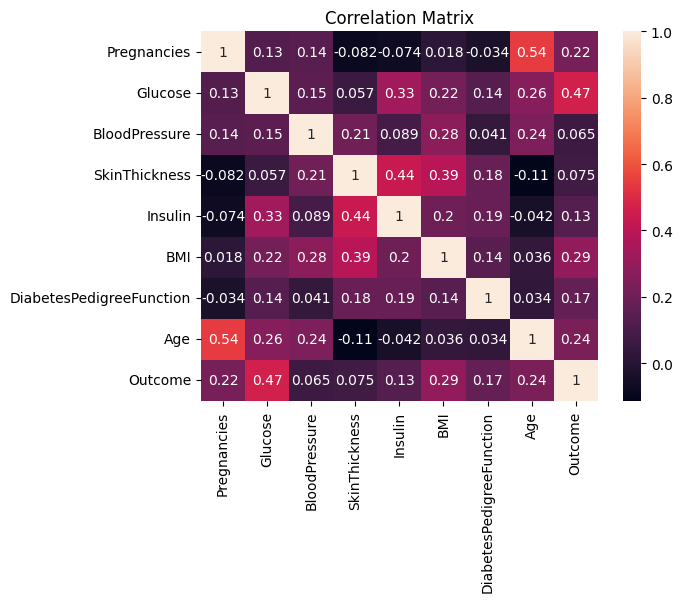

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

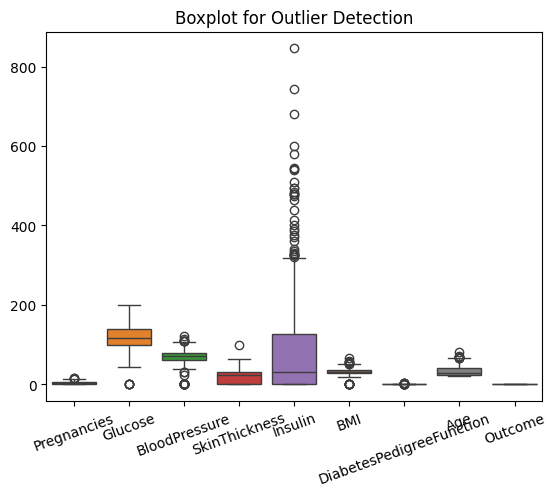

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=20)
plt.title("Boxplot for Outlier Detection")
plt.show()

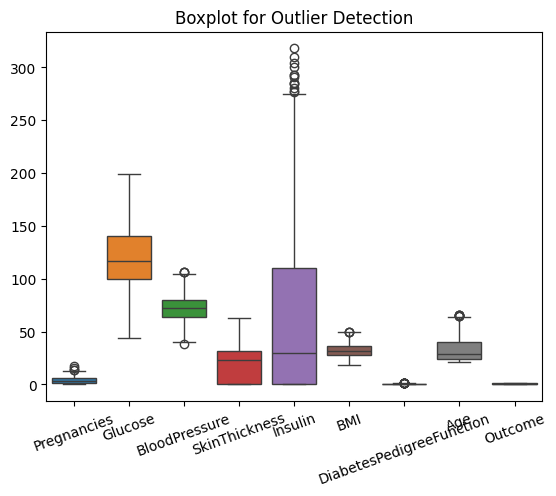

In [ ]:
#IQR method to handle outliers
def iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

numerical_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for col in numerical_features:
    iqr(df, col)

sns.boxplot(df)
plt.xticks(rotation=20)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE

In [ ]:
#normalize
scaler = StandardScaler()
numerical_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.866045      -0.017650       0.928238 -0.785193  0.218695   
1            1 -1.205066      -0.556276       0.545788 -0.785193 -0.873966   
2            8  2.016662      -0.735818      -1.302720 -0.785193 -1.389077   
3            1 -1.073567      -0.556276       0.163338  0.426380 -0.639824   
4            0  0.504422      -2.890320       0.928238  1.380171  1.701591   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.813594  1.560400        1  
1                 -0.312924 -0.159340        0  
2                  0.997265 -0.068827        1  
3                 -1.063936 -1.064466        0  
4                 -0.225170  0.021685        1  


Feature Engineering and selection

In [ ]:
#no effect cuz no categorical values
categorical_features = df.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      0.0  26.6   
2            8    183.0           64.0            0.0      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                    0.6270  50.0        1  
1                    0.3510  31.0        0  
2                    0.6720  32.0        1  
3                    0.1670  21.0        0  
4                    0.3725  33.0        1  


In [ ]:
#identify and remove highly correlated features
correlation_matrix = df.corr()
boundary = 0.7
rem_col = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > boundary:
            rem_col.add(correlation_matrix.columns[i])
df = df.drop(columns=rem_col)
print(f"Removed columns with high correlation: {rem_col}")

Removed columns with high correlation: set()


Feature Selection

In [ ]:
#selectkbest
x = df.drop(columns=['Outcome'])
y = df['Outcome']
#select top five columns
select = SelectKBest(score_func=mutual_info_classif, k=5)
x_selected = select.fit_transform(x, y)
select_feat = x.columns[select.get_support()]

print("Selected features:", select_feat)
print(pd.DataFrame(x_selected, columns=select_feat).head())

Selected features: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')
   Pregnancies  Glucose  Insulin   BMI   Age
0          6.0    148.0      0.0  33.6  50.0
1          1.0     85.0      0.0  26.6  31.0
2          8.0    183.0      0.0  23.3  32.0
3          1.0     89.0     94.0  28.1  21.0
4          0.0    137.0    168.0  43.1  33.0


In [ ]:
#RFE
X = df.drop(columns=['Outcome'])
y = df['Outcome']
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print(selected_features_rfe)

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


Model Development and Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42, stratify=y)

Hyperparameter Tuning

In [ ]:
#tune hyperparameters for logistic
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
top_lr = grid_lr.best_estimator_
print(grid_lr.best_params_)

{'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
#tune hyperparameters for decision
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
top_dt = grid_dt.best_estimator_
print(grid_dt.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#tune hyperparameters for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
top_rf = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


Train model

In [ ]:
#train and evalute
models = {
    "Logistic Regression": top_lr,
    "Decision Tree": top_dt,
    "Random Forest": top_rf
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

comp_tab = pd.DataFrame(results)
print("\nModel Performance:")
print(comp_tab)


Model Performance:
           Logistic Regression  Decision Tree  Random Forest
Accuracy              0.707792       0.694805       0.772727
Precision             0.588235       0.652174       0.672727
Recall                0.555556       0.277778       0.685185
F1 Score              0.571429       0.389610       0.678899


In [ ]:
import joblib

# Save the trained model
joblib.dump(top_rf, 'randomforest_model.pkl')
print("Model saved as random_forest_model.pkl")

from google.colab import files
files.download('randomforest_model.pkl')

Model saved as random_forest_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion matrix, Precision Recall Curve.

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, precision_recall_curve, auc
)


Confusion Matrix for Logistic Regression:
[[79 21]
 [24 30]]


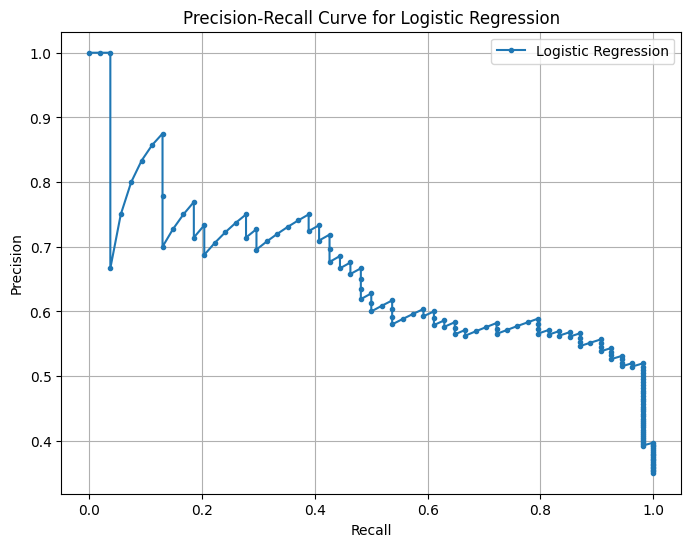


Confusion Matrix for Decision Tree:
[[92  8]
 [39 15]]


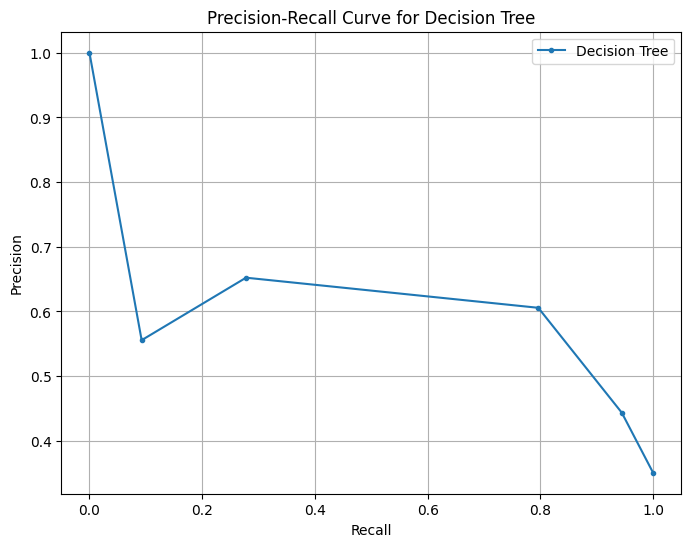


Confusion Matrix for Random Forest:
[[82 18]
 [17 37]]


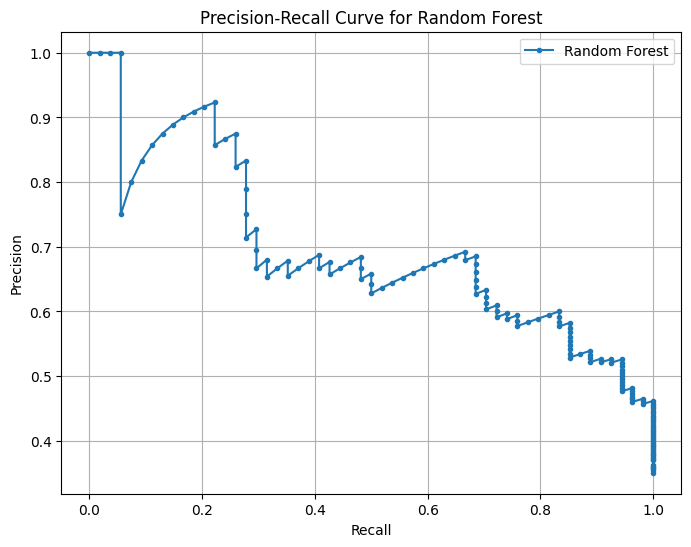

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:")
    print(cm)

    #precision-recall curve
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend()
    plt.grid()
    plt.show()